In [99]:
import pandas as pd
import numpy as np

df = pd.read_csv('data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


Data Preparation

In [100]:
def PrepareStrings(strings):
    return strings.str.lower().str.replace(' ', '_')

df.columns = PrepareStrings(df.columns)

stringCols = df.dtypes[df.dtypes == 'object'].index
for col in stringCols:
    df[col] = PrepareStrings(df[col])


In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='msrp', ylabel='Count'>

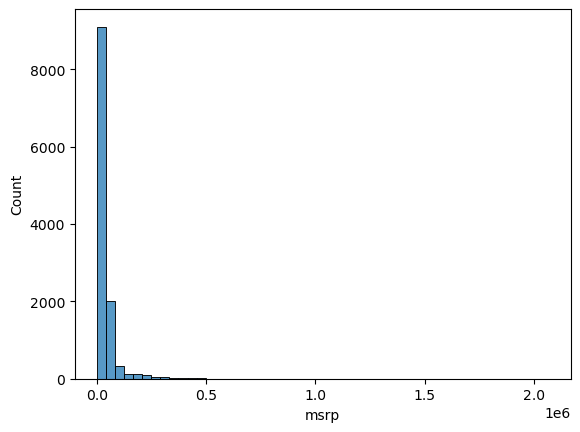

In [102]:
sns.histplot(df.msrp, bins=50)

<Axes: xlabel='msrp', ylabel='Count'>

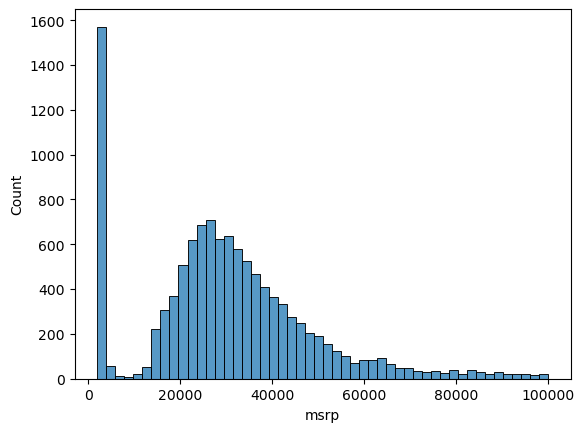

In [103]:
sns.histplot(df.msrp[df.msrp < 100000], bins=50)

In [104]:
price_logs = np.log1p(df.msrp)

<Axes: xlabel='msrp', ylabel='Count'>

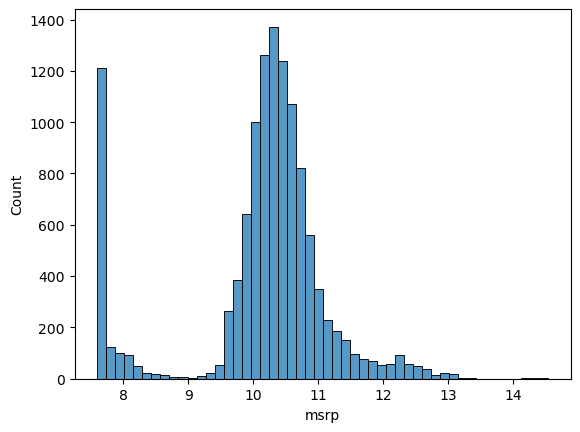

In [105]:

sns.histplot(price_logs, bins=50)

In [106]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [107]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
n_val, n_test, n_train

(2382, 2382, 7150)

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#df.head()
y = price_logs
X = df.loc[:, df.columns != 'msrp']
X = X.select_dtypes(include='number')
X = X.fillna(0)

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=n_val, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=n_test, random_state=0)
len(X_train), len(X_val), len(X_test), len(y_test)

(7150, 2382, 2382, 2382)

In [109]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [110]:
from LinReg_gradient_descent import LinearRegressionGD

lr_gd = LinearRegressionGD(l=0.001, iter=5000)
lr_gd.fit(X_train, y_train)

y_pr_gd = lr_gd.predict(X_test)

<Axes: xlabel='msrp', ylabel='Count'>

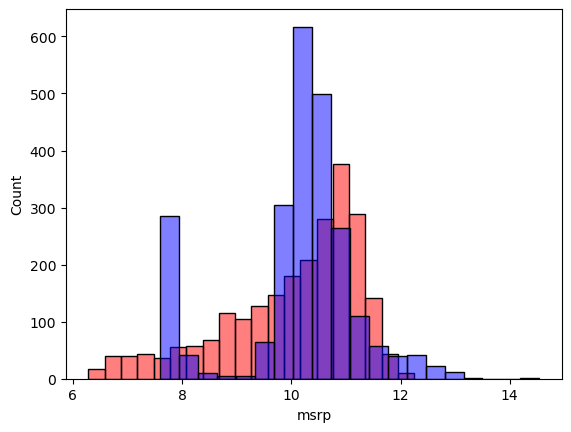

In [111]:
sns.histplot(y_pr_gd, color='red', alpha=0.5, bins=20)
sns.histplot(y_test, color='blue', alpha=0.5, bins=20)

In [112]:
def mse(y_1, y_2):
    return np.mean((y_1 - y_2)**2)

In [113]:
from LinReg_normal_equation import LinearRegressionNE

lr_ne = LinearRegressionNE()
lr_ne.fit(X_train, y_train)

y_pr_ne = lr_ne.predict(X_test)

<Axes: xlabel='msrp', ylabel='Count'>

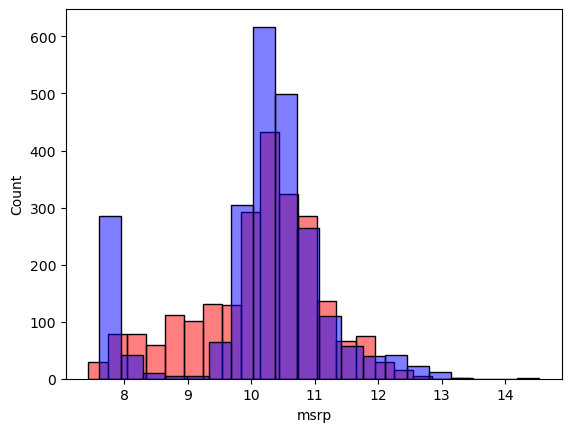

In [114]:
sns.histplot(y_pr_ne, color='red', alpha=0.5, bins=20)
sns.histplot(y_test, color='blue', alpha=0.5, bins=20)

In [116]:
mse_gd = mse(y_pr_gd, y_test)
mse_ne = mse(y_pr_ne, y_test)
mse_gd, mse_ne

(0.8864742557658379, 0.2627831120878375)